# Newspaper classification: Feature engineering

## Setup

Necessary installs are made for text processing:

In [1]:
!pip install spacy
!python -m spacy download de_core_news_sm
!pip install -U textblob-de

     |████████████████████████████████| 6.5 MB 28.4 MB/s eta 0:00:01
     |████████████████████████████████| 629 kB 31.2 MB/s eta 0:00:01
     |████████████████████████████████| 130 kB 85.8 MB/s eta 0:00:01
     |████████████████████████████████| 9.8 MB 71.5 MB/s eta 0:00:01
     |████████████████████████████████| 13.7 MB 69.2 MB/s eta 0:00:01
     |████████████████████████████████| 458 kB 69.8 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 3.3 MB/s  eta 0:00:01
     |████████████████████████████████| 18.8 MB 11.6 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
     |████████████████████████████████| 468 kB 18.5 MB/s eta 0:00:01
     |████████████████████████████████| 636 kB 72.8 MB/s eta 0:00:01


Libraries are imported:

In [2]:
import pandas as pd
import numpy as np
from project_lib import Project

import spacy
from textblob_de import TextBlobDE
import nltk
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

Data is loaded:

In [3]:
# The code was removed by Watson Studio for sharing.

In [4]:
project = Project(project_id = project_id, project_access_token = project_token)

In [5]:
df_file = project.get_file("Newspaper_Data.csv")
df_file.seek(0)
df = pd.read_csv(df_file)

This is the data:

In [6]:
df.head()

,Title,Newspaper,DateTime
0,"Taliban versprechen ""Amnestie"" - und werben fü...",SZ,2021-08-17 10:00:51.109716
1,Frau tot aus dem Wasser geborgen,SZ,2021-08-17 10:00:51.109716
2,Wenn ein einzelner Corona-Fall zum Lockdown führt,SZ,2021-08-17 10:00:51.109716
3,Mit diesen Argumenten überzeugen Sie Impfskept...,SZ,2021-08-17 10:00:51.109716
4,Vier Silben nähren die Titelhoffnungen,SZ,2021-08-17 10:00:51.109716


It has the following shape:

In [7]:
df.shape

(313, 3)

## Word mapping

Words are mapped using the spacy library:

In [8]:
nlp = spacy.load("de_core_news_sm")

docs = [nlp(text) for text in df['Title']]

title_vectors = [x.vector for x in docs]
nlp_vector_length = title_vectors[0].size

df_title_vectors = pd.DataFrame(title_vectors, 
                                columns = ['title_nlp_' + str(x) for x in range(nlp_vector_length)])

df = pd.concat([df.reset_index(drop=True), df_title_vectors], axis=1)

The new feature columns look as follows:

In [9]:
df[['title_nlp_' + str(x) for x in range(nlp_vector_length)]].head()

,title_nlp_0,title_nlp_1,title_nlp_2,title_nlp_3,title_nlp_4,title_nlp_5,title_nlp_6,title_nlp_7,title_nlp_8,title_nlp_9,...,title_nlp_86,title_nlp_87,title_nlp_88,title_nlp_89,title_nlp_90,title_nlp_91,title_nlp_92,title_nlp_93,title_nlp_94,title_nlp_95
0,1.056343,-0.331942,0.377576,-0.755563,1.121652,1.051834,-0.692204,0.981793,0.019544,-0.850741,...,0.716339,0.459867,0.928529,-1.462323,-0.245735,-0.145574,0.003700,-0.349982,-0.764239,-0.042902
1,0.482346,-1.360563,2.204261,-0.980908,0.938673,2.182759,0.753072,1.323434,0.003371,0.081252,...,0.477683,1.201029,-0.721859,-1.177253,0.305149,-1.245529,-0.426957,-0.187530,0.610376,-0.090306
2,0.719709,0.718557,1.878793,0.517712,0.685538,1.683592,0.760514,1.199788,-0.524071,0.422914,...,-2.042490,-0.952892,1.310398,-0.633470,1.561836,1.376056,0.862674,-1.260844,-0.054087,-0.305862
3,1.173115,0.131595,-1.171353,-0.516909,-0.515251,1.939519,1.228320,1.602004,-1.056640,-1.143206,...,0.106650,1.435582,-0.659123,1.024564,-0.468957,-1.644382,-1.046088,-1.202309,0.199285,1.258943
4,1.485402,-0.082825,0.894071,0.251246,-0.263389,0.542428,1.021385,0.517868,-1.834415,-1.062886,...,0.341137,-0.160645,-1.534141,-1.733571,-0.673529,-0.847832,-0.782896,-1.793984,2.312975,-0.406768


In [10]:
df[['title_nlp_' + str(x) for x in range(nlp_vector_length)]].describe()

,title_nlp_0,title_nlp_1,title_nlp_2,title_nlp_3,title_nlp_4,title_nlp_5,title_nlp_6,title_nlp_7,title_nlp_8,title_nlp_9,...,title_nlp_86,title_nlp_87,title_nlp_88,title_nlp_89,title_nlp_90,title_nlp_91,title_nlp_92,title_nlp_93,title_nlp_94,title_nlp_95
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,...,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,0.722186,0.191242,0.788787,-0.396232,0.446398,0.323293,-0.265774,1.001216,0.254026,-0.047084,...,-0.097288,-0.389813,0.115425,-0.512728,-0.389953,0.112777,0.269656,-0.635995,0.434154,-0.091176
std,0.820370,1.175197,0.822576,0.934083,1.080790,0.923352,0.783460,0.656202,0.878961,0.855713,...,0.746337,0.950711,0.913873,0.938796,0.772394,1.063577,0.822465,0.773188,0.767060,0.881764
min,-1.666177,-4.218761,-2.030822,-2.576029,-2.974498,-2.185191,-2.308221,-0.413571,-2.123183,-3.325447,...,-2.789074,-3.329174,-3.011971,-2.732933,-2.611873,-3.436779,-2.836069,-3.852253,-1.771328,-2.981324
25%,0.170814,-0.596480,0.264386,-0.994691,-0.258450,-0.293719,-0.749278,0.546386,-0.323116,-0.618945,...,-0.541426,-1.047594,-0.495237,-1.109140,-0.823366,-0.559520,-0.195143,-1.202309,-0.100206,-0.722555
50%,0.689593,0.226625,0.706934,-0.478840,0.413414,0.346982,-0.327375,0.847778,0.228876,-0.099892,...,-0.082012,-0.416557,0.136294,-0.622822,-0.393931,0.123897,0.259764,-0.598616,0.351275,-0.088211
75%,1.190672,0.859978,1.257738,0.129075,1.066311,0.960143,0.155133,1.323434,0.807690,0.457929,...,0.395678,0.196873,0.707451,0.019745,0.128415,0.780642,0.826655,-0.084231,0.985538,0.518165
max,3.142897,3.991287,3.448956,2.987796,4.919607,3.067809,2.949749,3.752843,2.826041,2.531121,...,2.190081,2.906531,2.546154,2.770215,2.223184,3.847835,2.670436,1.257196,3.596819,2.631299


## Sentiment mapping

Sentiment is mapped using the *textBlobDE* library:

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/wsuser/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
title_wikis = [TextBlobDE(text) for text in df['Title']]
title_polarity = [wiki.sentiment.polarity for wiki in title_wikis]
title_subjectivity = [wiki.sentiment.subjectivity for wiki in title_wikis]

df['title_polarity'], df['title_subjectivity'] = title_polarity, title_subjectivity

Polarity and Subjectivity differences per newspaper are shown below:

In [13]:
print("Polarity:")
df[['Newspaper', 'title_polarity']].groupby('Newspaper').describe()

Polarity:


title_polarity                                             
                   count      mean       std  min  25%  50%  75%  max
Newspaper                                                            
SZ                 118.0  0.049788  0.434029 -1.0  0.0  0.0  0.0  1.0
Welt               195.0 -0.004359  0.407335 -1.0  0.0  0.0  0.0  1.0

In [14]:
print("Subjectivity:")
df[['Newspaper', 'title_subjectivity']].groupby('Newspaper').describe()

Subjectivity:


title_subjectivity                                             
                       count      mean       std  min  25%  50%  75%  max
Newspaper                                                                
SZ                     118.0  0.027966  0.140138  0.0  0.0  0.0  0.0  1.0
Welt                   195.0  0.030769  0.157549  0.0  0.0  0.0  0.0  1.0

## Creating aggregate features

Aggregate features are created for word and character counts and normalised using the MinMaxScaler():

In [15]:
df['title_length'] = df['Title'].str.len()
df['title_word_count'] = df['Title'].apply(lambda x: len(x.split()))
df['title_avg_word_length'] = ( df['title_length'] - (df['title_word_count'] - 1) ) / df['title_word_count']

The word count differs by newspaper as shown below:

In [16]:
df[['Newspaper', 'title_word_count']].groupby('Newspaper').describe()

title_word_count                                              
                     count      mean       std  min  25%  50%  75%   max
Newspaper                                                               
SZ                   118.0  5.593220  2.390284  1.0  4.0  5.0  7.0  11.0
Welt                 195.0  7.697436  2.633203  2.0  6.0  8.0  9.0  16.0

<AxesSubplot:xlabel='Newspaper', ylabel='title_word_count'>

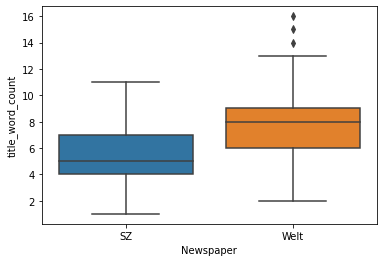

In [17]:
sns.boxplot(x = 'Newspaper', y = 'title_word_count', data = df)

## Saving

This is the resulting data, which is saved for newspaper classification:

In [18]:
df.head()

,Title,Newspaper,DateTime,title_nlp_0,title_nlp_1,title_nlp_2,title_nlp_3,title_nlp_4,title_nlp_5,title_nlp_6,...,title_nlp_91,title_nlp_92,title_nlp_93,title_nlp_94,title_nlp_95,title_polarity,title_subjectivity,title_length,title_word_count,title_avg_word_length
0,"Taliban versprechen ""Amnestie"" - und werben fü...",SZ,2021-08-17 10:00:51.109716,1.056343,-0.331942,0.377576,-0.755563,1.121652,1.051834,-0.692204,...,-0.145574,0.003700,-0.349982,-0.764239,-0.042902,1.0,0.0,73,11,5.727273
1,Frau tot aus dem Wasser geborgen,SZ,2021-08-17 10:00:51.109716,0.482346,-1.360563,2.204261,-0.980908,0.938673,2.182759,0.753072,...,-1.245529,-0.426957,-0.187530,0.610376,-0.090306,-1.0,0.0,32,6,4.500000
2,Wenn ein einzelner Corona-Fall zum Lockdown führt,SZ,2021-08-17 10:00:51.109716,0.719709,0.718557,1.878793,0.517712,0.685538,1.683592,0.760514,...,1.376056,0.862674,-1.260844,-0.054087,-0.305862,0.0,0.0,49,7,6.142857
3,Mit diesen Argumenten überzeugen Sie Impfskept...,SZ,2021-08-17 10:00:51.109716,1.173115,0.131595,-1.171353,-0.516909,-0.515251,1.939519,1.228320,...,-1.644382,-1.046088,-1.202309,0.199285,1.258943,1.0,0.0,50,6,7.500000
4,Vier Silben nähren die Titelhoffnungen,SZ,2021-08-17 10:00:51.109716,1.485402,-0.082825,0.894071,0.251246,-0.263389,0.542428,1.021385,...,-0.847832,-0.782896,-1.793984,2.312975,-0.406768,0.0,0.0,38,5,6.800000


In [19]:
project.save_data(file_name = "Newspaper_Data_Processed.csv", data = df.to_csv(index = False), set_project_asset=True, overwrite=True)

{'file_name': 'Newspaper_Data_Processed.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'newspaperclassification-donotdelete-pr-htkved6zqhsjcj',
 'asset_id': '8b89c69b-cf63-4763-b8c1-7ba23c8a1488'}